# 9.4 Bayesian Inference for Normal Distribution

## Normal Distribution with Unknown Mean

### Setup

**Data**: \(x_1, \ldots, x_n \sim N(\mu, \sigma^2)\) where \(\sigma^2\) is **known**

**Goal**: Infer \(\mu\)

### Prior

**Conjugate prior**: \(\mu \sim N(\mu_0, \sigma_0^2)\)

This represents our belief about \(\mu\) before seeing data.

### Likelihood

For a single observation:
$$
p(x \mid \mu) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

For n observations:
$$
p(x_1, \ldots, x_n \mid \mu) \propto \exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^2\right)
$$

### Posterior Derivation

Applying Bayes' theorem:
$$
p(\mu \mid x_1, \ldots, x_n) \propto p(x_1, \ldots, x_n \mid \mu) \cdot p(\mu)
$$

$$
\propto \exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^2\right) \cdot \exp\left(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}\right)
$$

Completing the square (algebra omitted), we get:

**Posterior**: \(\mu \mid x_1, \ldots, x_n \sim N(\mu_n, \sigma_n^2)\)

where:

$$
\sigma_n^2 = \frac{1}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}
$$

$$
\mu_n = \sigma_n^2 \left(\frac{\mu_0}{\sigma_0^2} + \frac{n\bar{x}}{\sigma^2}\right)
$$

### Precision Form (Cleaner)

Define **precision** \(\tau = 1/\sigma^2\):

$$
\tau_n = \tau_0 + n\tau \quad \text{(precisions add!)}
$$

$$
\mu_n = \frac{\tau_0 \mu_0 + n\tau\bar{x}}{\tau_n}
$$

The posterior mean is a **precision-weighted average** of prior mean and sample mean.

### Python Implementation

Bayesian Inference for Normal Mean
True μ: 10, True σ: 2
Prior: N(5, 5²)
Known σ: 2

n= 1: x̄= 10.99, Posterior N(10.17, 1.86²), 95% CI=[6.53, 13.81]
n= 5: x̄= 10.92, Posterior N(10.73, 0.88²), 95% CI=[9.01, 12.46]
n=10: x̄= 10.90, Posterior N(10.80, 0.63²), 95% CI=[9.57, 12.03]
n=20: x̄=  9.66, Posterior N(9.62, 0.45²), 95% CI=[8.75, 10.49]
n=50: x̄=  9.55, Posterior N(9.53, 0.28²), 95% CI=[8.98, 10.09]


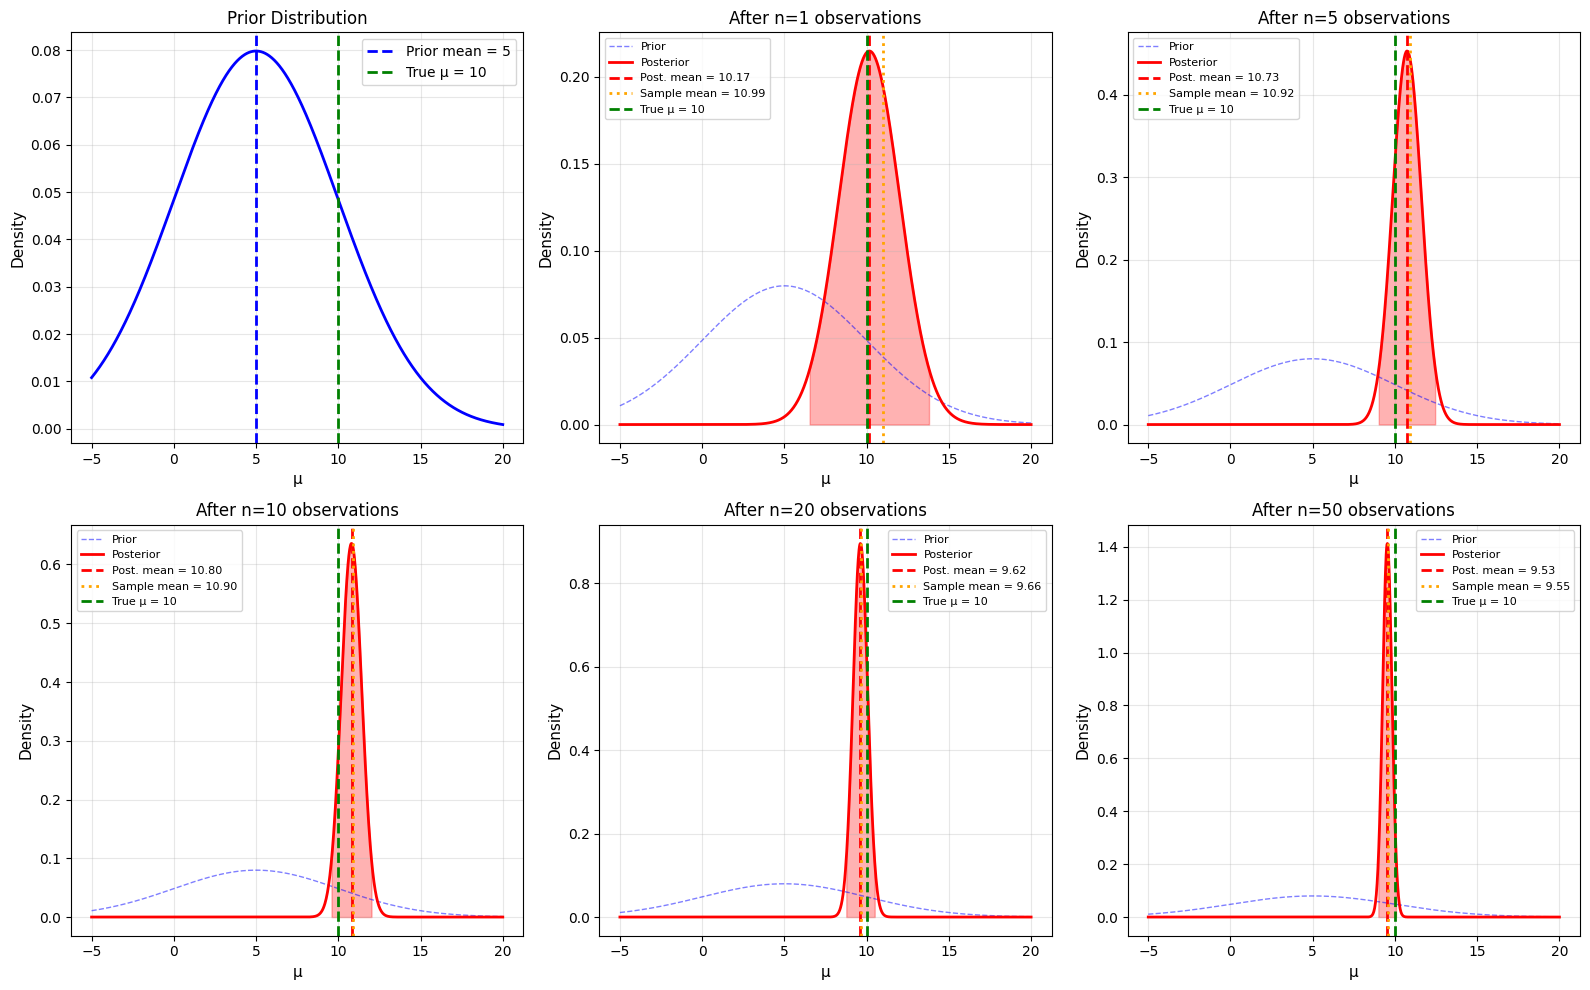

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

# True parameters (unknown to the model)
true_mu = 10
true_sigma = 2

# Generate data
n_samples = [1, 5, 10, 20, 50]
all_data = np.random.normal(true_mu, true_sigma, max(n_samples))

# Prior: N(mu_0=5, sigma_0=5)
mu_0 = 5
sigma_0 = 5

print("Bayesian Inference for Normal Mean")
print("="*70)
print(f"True μ: {true_mu}, True σ: {true_sigma}")
print(f"Prior: N({mu_0}, {sigma_0}²)")
print(f"Known σ: {true_sigma}")
print()

# Create subplots for different sample sizes
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

mu_values = np.linspace(-5, 20, 1000)

# Prior distribution
prior = stats.norm.pdf(mu_values, mu_0, sigma_0)
axes[0].plot(mu_values, prior, 'b-', linewidth=2)
axes[0].axvline(mu_0, color='blue', linestyle='--', linewidth=2,
               label=f'Prior mean = {mu_0}')
axes[0].axvline(true_mu, color='green', linestyle='--', linewidth=2,
               label=f'True μ = {true_mu}')
axes[0].set_xlabel('μ', fontsize=11)
axes[0].set_ylabel('Density', fontsize=11)
axes[0].set_title('Prior Distribution', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Posteriors for increasing sample sizes
for idx, n in enumerate(n_samples):
    data = all_data[:n]
    xbar = np.mean(data)
    
    # Posterior parameters
    sigma_n_sq = 1 / (1/sigma_0**2 + n/true_sigma**2)
    sigma_n = np.sqrt(sigma_n_sq)
    mu_n = sigma_n_sq * (mu_0/sigma_0**2 + n*xbar/true_sigma**2)
    
    # Posterior distribution
    posterior = stats.norm.pdf(mu_values, mu_n, sigma_n)
    
    # Plot
    ax = axes[idx + 1]
    ax.plot(mu_values, prior, 'b--', linewidth=1, alpha=0.5, label='Prior')
    ax.plot(mu_values, posterior, 'r-', linewidth=2, label='Posterior')
    ax.axvline(mu_n, color='red', linestyle='--', linewidth=2,
              label=f'Post. mean = {mu_n:.2f}')
    ax.axvline(xbar, color='orange', linestyle=':', linewidth=2,
              label=f'Sample mean = {xbar:.2f}')
    ax.axvline(true_mu, color='green', linestyle='--', linewidth=2,
              label=f'True μ = {true_mu}')
    
    # 95% Credible interval
    ci_lower = stats.norm.ppf(0.025, mu_n, sigma_n)
    ci_upper = stats.norm.ppf(0.975, mu_n, sigma_n)
    ax.fill_between(mu_values[(mu_values >= ci_lower) & (mu_values <= ci_upper)],
                     0,
                     posterior[(mu_values >= ci_lower) & (mu_values <= ci_upper)],
                     alpha=0.3, color='red')
    
    ax.set_xlabel('μ', fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.set_title(f'After n={n} observations', fontsize=12)
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)
    
    print(f"n={n:2d}: x̄={xbar:6.2f}, Posterior N({mu_n:.2f}, {sigma_n:.2f}²), 95% CI=[{ci_lower:.2f}, {ci_upper:.2f}]")

plt.tight_layout()
plt.savefig('bayesian_normal_mean.png', dpi=150, bbox_inches='tight')
plt.show()


## Normal Distribution with Unknown Variance

### Setup

**Data**: \(x_1, \ldots, x_n \sim N(\mu, \sigma^2)\) where \(\mu\) is **known**

**Goal**: Infer \(\sigma^2\)

### Prior

**Conjugate prior**: \(\sigma^2 \sim \text{Inverse-Gamma}(\alpha, \beta)\)

PDF:
$$
p(\sigma^2) = \frac{\beta^\alpha}{\Gamma(\alpha)}(\sigma^2)^{-(\alpha+1)}\exp\left(-\frac{\beta}{\sigma^2}\right)
$$

### Likelihood

$$
p(x_1, \ldots, x_n \mid \sigma^2) \propto (\sigma^2)^{-n/2}\exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2\right)
$$

### Posterior

$$
\sigma^2 \mid x_1, \ldots, x_n \sim \text{Inverse-Gamma}\left(\alpha + \frac{n}{2}, \beta + \frac{1}{2}\sum_{i=1}^{n}(x_i-\mu)^2\right)
$$

### Python Example

Bayesian Inference for Normal Variance
True σ²: 4
Known μ: 0
Sample size: 30

Prior: Inverse-Gamma(3, 2)
  Prior mean: 1.00

Posterior: Inverse-Gamma(18.0, 51.10)
  Posterior mean: 3.01


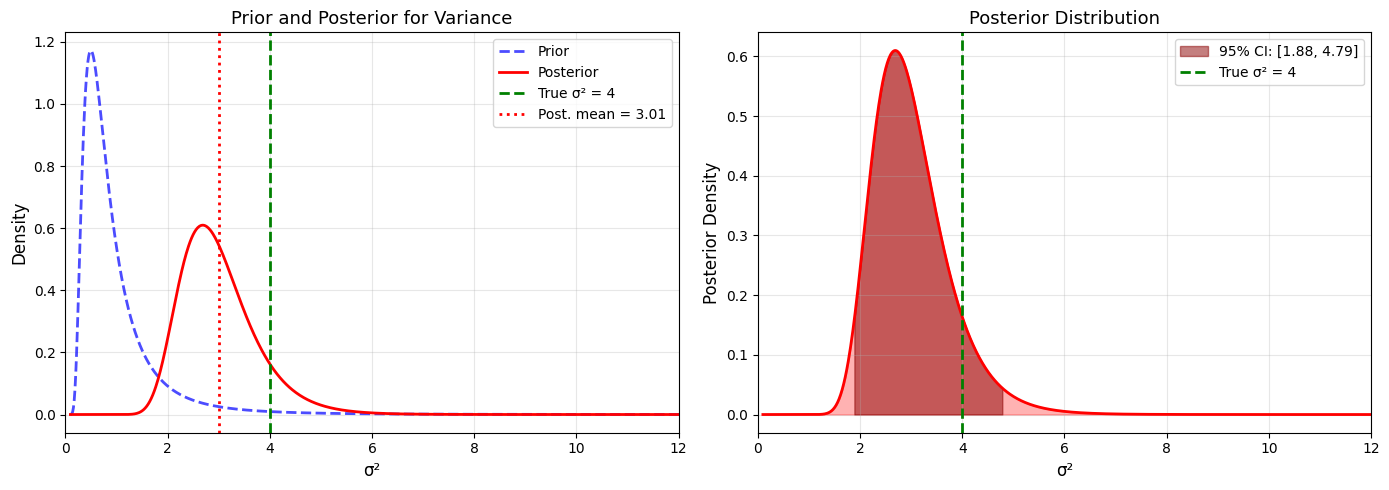


95% Credible Interval for σ²: [1.878, 4.790]
True σ² = 4 is inside the interval


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

# True parameters
true_mu = 0  # Known
true_sigma2 = 4  # Unknown

# Generate data
n = 30
data = np.random.normal(true_mu, np.sqrt(true_sigma2), n)

# Prior: Inverse-Gamma(3, 2)
alpha_prior = 3
beta_prior = 2

print("Bayesian Inference for Normal Variance")
print("="*70)
print(f"True σ²: {true_sigma2}")
print(f"Known μ: {true_mu}")
print(f"Sample size: {n}")
print()

# Posterior parameters
ss = np.sum((data - true_mu)**2)  # Sum of squares
alpha_post = alpha_prior + n/2
beta_post = beta_prior + ss/2

print(f"Prior: Inverse-Gamma({alpha_prior}, {beta_prior})")
print(f"  Prior mean: {beta_prior/(alpha_prior-1):.2f}")
print()
print(f"Posterior: Inverse-Gamma({alpha_post:.1f}, {beta_post:.2f})")
print(f"  Posterior mean: {beta_post/(alpha_post-1):.2f}")

# Visualization
sigma2_values = np.linspace(0.1, 15, 1000)

# Prior (using scipy.stats.invgamma)
prior = stats.invgamma.pdf(sigma2_values, alpha_prior, scale=beta_prior)

# Posterior
posterior = stats.invgamma.pdf(sigma2_values, alpha_post, scale=beta_post)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Prior and posterior
ax1.plot(sigma2_values, prior, 'b--', linewidth=2, label='Prior', alpha=0.7)
ax1.plot(sigma2_values, posterior, 'r-', linewidth=2, label='Posterior')
ax1.axvline(true_sigma2, color='green', linestyle='--', linewidth=2,
           label=f'True σ² = {true_sigma2}')
ax1.axvline(beta_post/(alpha_post-1), color='red', linestyle=':', linewidth=2,
           label=f'Post. mean = {beta_post/(alpha_post-1):.2f}')
ax1.set_xlabel('σ²', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.set_title('Prior and Posterior for Variance', fontsize=13)
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)
ax1.set_xlim(0, 12)

# Credible interval
ci_lower = stats.invgamma.ppf(0.025, alpha_post, scale=beta_post)
ci_upper = stats.invgamma.ppf(0.975, alpha_post, scale=beta_post)

ax2.fill_between(sigma2_values, 0, posterior, alpha=0.3, color='red')
ax2.fill_between(sigma2_values[(sigma2_values >= ci_lower) & (sigma2_values <= ci_upper)],
                  0,
                  posterior[(sigma2_values >= ci_lower) & (sigma2_values <= ci_upper)],
                  alpha=0.5, color='darkred',
                  label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
ax2.plot(sigma2_values, posterior, 'r-', linewidth=2)
ax2.axvline(true_sigma2, color='green', linestyle='--', linewidth=2,
           label=f'True σ² = {true_sigma2}')
ax2.set_xlabel('σ²', fontsize=12)
ax2.set_ylabel('Posterior Density', fontsize=12)
ax2.set_title('Posterior Distribution', fontsize=13)
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)
ax2.set_xlim(0, 12)

plt.tight_layout()
plt.savefig('bayesian_normal_variance.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n95% Credible Interval for σ²: [{ci_lower:.3f}, {ci_upper:.3f}]")
print(f"True σ² = {true_sigma2} is {'inside' if ci_lower <= true_sigma2 <= ci_upper else 'outside'} the interval")

## Normal with Both Parameters Unknown

### The Challenge

When **both** \(\mu\) and \(\sigma^2\) are unknown, we need a **joint prior**.

### Normal-Gamma Conjugate Prior

**Joint prior**: 
$$
p(\mu, \sigma^2) = p(\mu \mid \sigma^2) \cdot p(\sigma^2)
$$

where:
- \(\sigma^2 \sim \text{Inverse-Gamma}(\alpha, \beta)\)
- \(\mu \mid \sigma^2 \sim N\left(\mu_0, \frac{\sigma^2}{\kappa_0}\right)\)

This is called the **Normal-Gamma** (or **Normal-Inverse-Gamma**) distribution.

### Hyperparameters

- \(\mu_0\): prior guess for mean
- \(\kappa_0\): "pseudo-observations" for mean (confidence in \(\mu_0\))
- \(\alpha\): shape for variance
- \(\beta\): scale for variance

### Posterior

Given data \(x_1, \ldots, x_n\):

$$
\mu, \sigma^2 \mid x_1, \ldots, x_n \sim \text{Normal-Gamma}(\mu_n, \kappa_n, \alpha_n, \beta_n)
$$

where:

$$
\kappa_n = \kappa_0 + n
$$

$$
\mu_n = \frac{\kappa_0 \mu_0 + n\bar{x}}{\kappa_n}
$$

$$
\alpha_n = \alpha + \frac{n}{2}
$$

$$
\beta_n = \beta + \frac{1}{2}\sum_{i=1}^{n}(x_i - \bar{x})^2 + \frac{\kappa_0 n(\bar{x} - \mu_0)^2}{2\kappa_n}
$$

### Marginal Posteriors

**For \(\sigma^2\)**:
$$
\sigma^2 \mid x_1, \ldots, x_n \sim \text{Inverse-Gamma}(\alpha_n, \beta_n)
$$

**For \(\mu\)** (marginalized over \(\sigma^2\)):
$$
\mu \mid x_1, \ldots, x_n \sim t_{2\alpha_n}\left(\mu_n, \frac{\beta_n}{\alpha_n \kappa_n}\right)
$$

This is a **Student's t-distribution** with \(2\alpha_n\) degrees of freedom!

### Python Implementation

Bayesian Inference for Normal (both parameters unknown)
True parameters: μ = 10, σ² = 4
Data: n = 20, x̄ = 9.66

Prior: Normal-Gamma(8, 1, 2, 2)

Posterior: Normal-Gamma(9.58, 21, 12.0, 38.33)

Posterior mean of μ: 9.58
Posterior mean of σ²: 3.48

Marginal posterior for μ: t_{24}(9.58, 0.39²)
95% Credible Interval for μ: [8.77, 10.38]

Marginal posterior for σ²: Inverse-Gamma(12.0, 38.33)
95% Credible Interval for σ²: [1.95, 6.18]


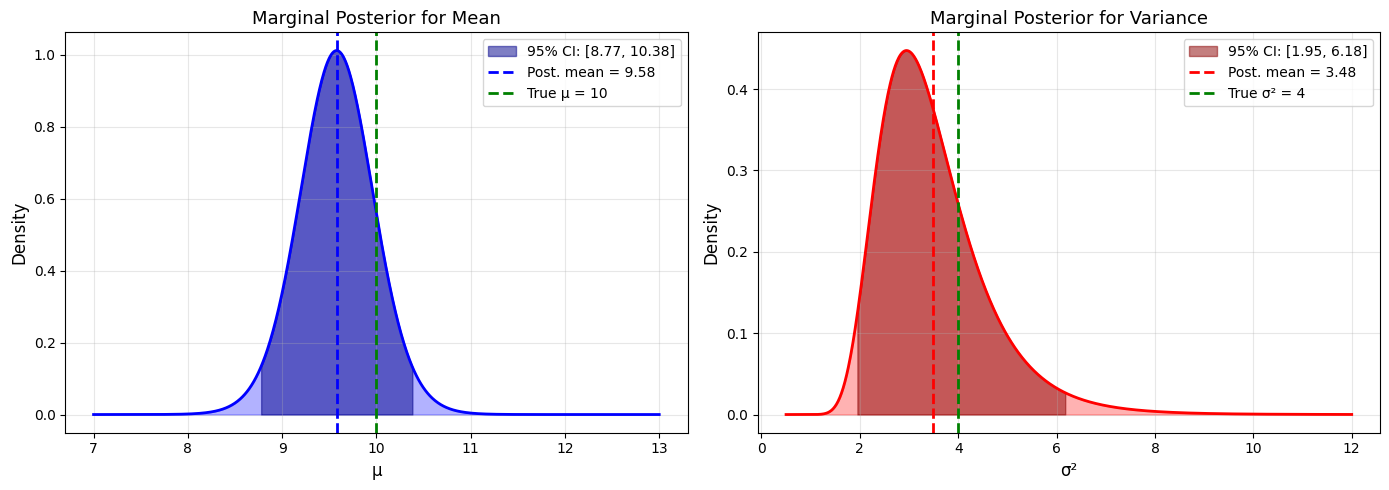

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

# True parameters (both unknown)
true_mu = 10
true_sigma2 = 4

# Generate data
n = 20
data = np.random.normal(true_mu, np.sqrt(true_sigma2), n)
xbar = np.mean(data)
ss = np.sum((data - xbar)**2)

print("Bayesian Inference for Normal (both parameters unknown)")
print("="*70)
print(f"True parameters: μ = {true_mu}, σ² = {true_sigma2}")
print(f"Data: n = {n}, x̄ = {xbar:.2f}")
print()

# Prior hyperparameters (weakly informative)
mu_0 = 8      # Prior mean
kappa_0 = 1   # Prior "sample size" for mean
alpha = 2     # Prior shape for variance
beta = 2      # Prior scale for variance

print(f"Prior: Normal-Gamma({mu_0}, {kappa_0}, {alpha}, {beta})")
print()

# Posterior hyperparameters
kappa_n = kappa_0 + n
mu_n = (kappa_0 * mu_0 + n * xbar) / kappa_n
alpha_n = alpha + n/2
beta_n = beta + 0.5*ss + (kappa_0*n*(xbar - mu_0)**2)/(2*kappa_n)

print(f"Posterior: Normal-Gamma({mu_n:.2f}, {kappa_n}, {alpha_n:.1f}, {beta_n:.2f})")
print()
print(f"Posterior mean of μ: {mu_n:.2f}")
print(f"Posterior mean of σ²: {beta_n/(alpha_n-1):.2f}")

# Marginal posterior for mu (Student's t)
df_mu = 2 * alpha_n
scale_mu = np.sqrt(beta_n / (alpha_n * kappa_n))

ci_mu_lower = stats.t.ppf(0.025, df_mu, loc=mu_n, scale=scale_mu)
ci_mu_upper = stats.t.ppf(0.975, df_mu, loc=mu_n, scale=scale_mu)

print(f"\nMarginal posterior for μ: t_{{{df_mu:.0f}}}({mu_n:.2f}, {scale_mu:.2f}²)")
print(f"95% Credible Interval for μ: [{ci_mu_lower:.2f}, {ci_mu_upper:.2f}]")

# Marginal posterior for sigma^2
ci_sigma2_lower = stats.invgamma.ppf(0.025, alpha_n, scale=beta_n)
ci_sigma2_upper = stats.invgamma.ppf(0.975, alpha_n, scale=beta_n)

print(f"\nMarginal posterior for σ²: Inverse-Gamma({alpha_n:.1f}, {beta_n:.2f})")
print(f"95% Credible Interval for σ²: [{ci_sigma2_lower:.2f}, {ci_sigma2_upper:.2f}]")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Marginal posterior for mu
mu_values = np.linspace(7, 13, 1000)
posterior_mu = stats.t.pdf(mu_values, df_mu, loc=mu_n, scale=scale_mu)

ax1.fill_between(mu_values, 0, posterior_mu, alpha=0.3, color='blue')
ax1.fill_between(mu_values[(mu_values >= ci_mu_lower) & (mu_values <= ci_mu_upper)],
                  0,
                  posterior_mu[(mu_values >= ci_mu_lower) & (mu_values <= ci_mu_upper)],
                  alpha=0.5, color='darkblue',
                  label=f'95% CI: [{ci_mu_lower:.2f}, {ci_mu_upper:.2f}]')
ax1.plot(mu_values, posterior_mu, 'b-', linewidth=2)
ax1.axvline(mu_n, color='blue', linestyle='--', linewidth=2,
           label=f'Post. mean = {mu_n:.2f}')
ax1.axvline(true_mu, color='green', linestyle='--', linewidth=2,
           label=f'True μ = {true_mu}')
ax1.set_xlabel('μ', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.set_title('Marginal Posterior for Mean', fontsize=13)
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)

# Marginal posterior for sigma^2
sigma2_values = np.linspace(0.5, 12, 1000)
posterior_sigma2 = stats.invgamma.pdf(sigma2_values, alpha_n, scale=beta_n)

ax2.fill_between(sigma2_values, 0, posterior_sigma2, alpha=0.3, color='red')
ax2.fill_between(sigma2_values[(sigma2_values >= ci_sigma2_lower) & (sigma2_values <= ci_sigma2_upper)],
                  0,
                  posterior_sigma2[(sigma2_values >= ci_sigma2_lower) & (sigma2_values <= ci_sigma2_upper)],
                  alpha=0.5, color='darkred',
                  label=f'95% CI: [{ci_sigma2_lower:.2f}, {ci_sigma2_upper:.2f}]')
ax2.plot(sigma2_values, posterior_sigma2, 'r-', linewidth=2)
ax2.axvline(beta_n/(alpha_n-1), color='red', linestyle='--', linewidth=2,
           label=f'Post. mean = {beta_n/(alpha_n-1):.2f}')
ax2.axvline(true_sigma2, color='green', linestyle='--', linewidth=2,
           label=f'True σ² = {true_sigma2}')
ax2.set_xlabel('σ²', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('Marginal Posterior for Variance', fontsize=13)
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('bayesian_normal_both.png', dpi=150, bbox_inches='tight')
plt.show()


## Posterior Predictive Distribution

### Definition

Predict a **new observation** \(\tilde{x}\) given observed data:

$$
p(\tilde{x} \mid x_1, \ldots, x_n) = \int p(\tilde{x} \mid \mu, \sigma^2) p(\mu, \sigma^2 \mid x_1, \ldots, x_n) d\mu d\sigma^2
$$

### Result for Normal-Gamma

The posterior predictive is a **Student's t-distribution**:

$$
\tilde{x} \mid x_1, \ldots, x_n \sim t_{2\alpha_n}\left(\mu_n, \frac{\beta_n(\kappa_n+1)}{\alpha_n\kappa_n}\right)
$$

### Python Example

In [4]:
# Using posteriors from previous example

# Posterior predictive distribution
df_pred = 2 * alpha_n
scale_pred = np.sqrt(beta_n * (kappa_n + 1) / (alpha_n * kappa_n))

print("\nPosterior Predictive Distribution")
print("="*70)
print(f"Distribution: t_{{{df_pred:.0f}}}({mu_n:.2f}, {scale_pred:.2f}²)")

# 95% prediction interval
pred_lower = stats.t.ppf(0.025, df_pred, loc=mu_n, scale=scale_pred)
pred_upper = stats.t.ppf(0.975, df_pred, loc=mu_n, scale=scale_pred)

print(f"95% Prediction Interval: [{pred_lower:.2f}, {pred_upper:.2f}]")
print(f"\nThis interval will contain the next observation with 95% probability")

# Compare with credible interval for mu
print(f"\nComparison:")
print(f"  95% CI for μ:          [{ci_mu_lower:.2f}, {ci_mu_upper:.2f}]  (width: {ci_mu_upper-ci_mu_lower:.2f})")
print(f"  95% Prediction interval: [{pred_lower:.2f}, {pred_upper:.2f}]  (width: {pred_upper-pred_lower:.2f})")
print(f"\nPrediction interval is wider (accounts for data variability + parameter uncertainty)")


Posterior Predictive Distribution
Distribution: t_{24}(9.58, 1.83²)
95% Prediction Interval: [5.80, 13.35]

This interval will contain the next observation with 95% probability

Comparison:
  95% CI for μ:          [8.77, 10.38]  (width: 1.61)
  95% Prediction interval: [5.80, 13.35]  (width: 7.55)

Prediction interval is wider (accounts for data variability + parameter uncertainty)


## Summary

### Bayesian Inference for Normal Distribution

| Unknown | Known | Prior | Posterior |
|---------|-------|-------|------------|
| \(\mu\) | \(\sigma^2\) | Normal | Normal |
| \(\sigma^2\) | \(\mu\) | Inverse-Gamma | Inverse-Gamma |
| Both | None | Normal-Gamma | Normal-Gamma |

### Key Points

1. **Normal-Normal conjugacy**: Clean, interpretable updates when \(\sigma^2\) known
2. **Precision formulation**: Makes calculations cleaner (precisions add)
3. **Normal-Gamma**: Handles realistic case of both parameters unknown
4. **Marginal posteriors**: Can get distributions for each parameter separately
5. **Predictive distribution**: Always wider than parameter credible intervals

### Why Student's t Appears

When marginalizing over an uncertain variance, the Normal distribution becomes a **t-distribution**:
- Heavier tails (more uncertainty)
- Degrees of freedom increase with more data
- Approaches Normal as \(n \to \infty\)

This is why we use t-tests in frequentist statistics!